In [1]:
import sys
sys.path.insert(1, '/home/nicolas/Documents/Stage/code/stage/src/')
sys.path.insert(1, '/home/nicolas/Documents/Stage/code/stage/model/')
import torch
import rbm
import functions
import matplotlib.pyplot as plt
import numpy as np
import math
device = torch.device("cuda")

In [2]:
fname_2 = './model/AllParametersLongRUNExMC_MNIST_Nh500_lr0.01_l20.0_NGibbs10.h5'
myRBM, f, alltimes = functions.retrieveRBM(device, fname_2)




In [3]:
index = -1
t = np.array(alltimes)[index]
myRBM.W = torch.tensor(f['paramW'+str(t)], device = myRBM.device)
myRBM.vbias = torch.tensor(f['paramVB'+str(t)], device = myRBM.device)
myRBM.hbias = torch.tensor(f['paramHB'+str(t)], device = myRBM.device)
H = functions.compute_H(myRBM.W, myRBM.hbias, dev = device)

In [22]:
def compute_interactions_distance(H):
    interactions = []
    for i in range(len(H)):
        vec = H[i]
        vec = vec.view(28,28)
        vec = vec+vec.T
        
        interactions.append(vec[0])
    return interactions

In [23]:
inter = compute_interactions_distance(H)

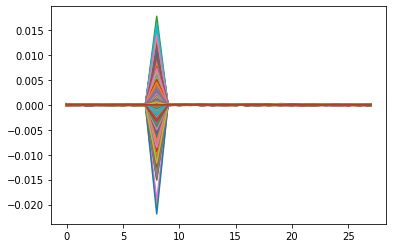

In [26]:
for i in range(len(inter)):
    plt.plot(inter[i].cpu())
plt.show()